In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cpu=pd.read_csv('../results/cpu/work_time.csv')
memory=pd.read_csv('../results/memory/work_memory.csv')

# CPU

In [ ]:
cpu = cpu.iloc[: , 1:]

In [ ]:
cpu=cpu.melt()
cpu.rename(columns = {"variable": "Callers","value":"CPU Time"}, 
          inplace = True)

In [3]:
cpu

,Unnamed: 0,arcasHLA,HLAforest,PHLAT,seq2HLA,HLAVBSeq,Optitype
0,1,279.18,1765.37,500.20,186.74,4765.65,1454.56
1,2,167.47,683.57,261.31,90.26,1463.20,716.87
2,3,401.41,1997.34,540.51,136.90,5283.79,1238.41
3,4,94.42,954.57,280.96,145.71,3414.70,663.41
4,5,690.39,3063.54,727.90,355.08,1253.88,2461.20
5,6,166.93,737.21,212.20,130.90,2848.42,814.28
6,7,224.68,1933.62,516.36,371.80,6323.20,2118.37
7,8,269.69,1917.87,466.30,151.43,3783.95,1134.51
8,9,201.60,1589.44,447.99,196.89,8611.24,1408.30
9,10,303.81,1704.69,483.59,151.89,7838.62,1134.15


# Memory

In [ ]:
memory
memory = memory.iloc[: , 1:]
memory=memory.melt()
memory.rename(columns = {"variable": "Callers","value":"Memory"}, 
          inplace = True)

In [ ]:
memory['Memory']=memory['Memory'].div(10**3)

In [ ]:
df=pd.merge(cpu,memory)

In [ ]:
df=df.melt(id_vars=["Callers"])
df.rename(columns = {"variable": "Metric"}, 
          inplace = True)

# Plots

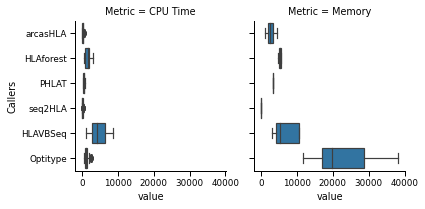

In [ ]:
g = sns.FacetGrid(df, col="Metric")
g.map_dataframe(sns.boxplot, x="value", y="Callers")

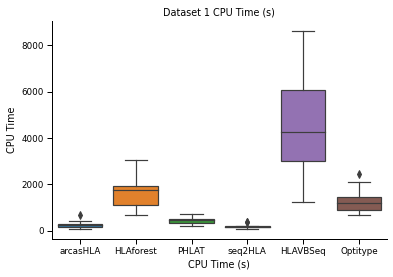

In [ ]:
sns.set_context("paper")
sns.color_palette("pastel")
ax = sns.boxplot(x="Callers",y="CPU Time", data=cpu)
ax.set_xlabel("CPU Time (s)")
ax.set_title("Dataset 1 CPU Time (s)") 
sns.despine()
plt.savefig('../Figures/d1_cpu.png',bbox_inches ="tight",dpi=300)

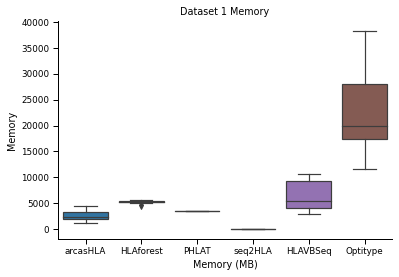

In [ ]:
sns.set_context("paper")
sns.color_palette("pastel")
ax = sns.boxplot(x="Callers",y="Memory", data=memory)
ax.set_xlabel("Memory (MB)")
ax.set_title("Dataset 1 Memory") 
sns.despine()
plt.savefig('../Figures/d1_memory.png',bbox_inches ="tight",dpi=300)